# Lesson 125: Naive Bayes Classifier - Heart Disease Prediction

---

### Teacher-Student Activities

In this class we will revisit the UCI's **heart disease dataset** and predict the chances of a person getting heart disease.  Before we start, let's first recall the attributes or columns of the dataset.

**Data Description**

The Heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Name|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type <br> -- Value 1: typical angina <br> -- Value 2: atypical angina <br> -- Value 3: non-anginal pain <br> -- Value 4: asymptomatic |
|trestbps|resting blood pressure (in mm Hg on admission to the hospital) |
|chol|serum cholesterol in mg/dl|
|fbs| (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) |
|restecg| resting electrocardiographic results <br> -- Value 0: normal <br> -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br> -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no) |
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment <br> -- Value 1: upsloping <br> -- Value 2: flat <br> -- Value 3: downsloping |
|ca|number of major vessels (0-3) colored by flourosopy |
|thal| 3 = normal; 6 = fixed defect; 7 = reversable defect|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Acknowledgements:**

Creators:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

**Citations:** Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.


---

#### Activity 1: Loading Data

Import the basic libraries and load the heart disease dataset.

Here's the dataset link: https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv


In [95]:
# S1.1: Import the required modules and load the heart disease dataset. Also, display the first five rows.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv')
# read the csv file and create the DataFrame


Now, let's find out the total number of rows, features, data types of columns (features) and the count of missing values (if any) in the dataset.

In [96]:
# S1.2: Apply the 'info()' function on the 'df' DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset consists of 14 features and 303 datapoints and all are non-null and integer/float values. Let's see the distribution of the `target` feature in the dataset.

In [97]:
# S1.3: Print the number of records in each target label
df['target'].value_counts()

,count
target,
1,165
0,138


The target variable `target` has two values: `0` and `1`. This means that our dataset is composed of two classes or labels:

 - Class `0` - Patients NOT having heart disease
 - Class `1` - Patients having heart disease

Hence, this is a **binary classification** problem where the target attribute can have only two possible values (e.g. `0` and `1`).



Before we proceed for EDA, let's create separate DataFrames for features and the target column.

1. Create a `features_df` DataFrame by dropping the `target` column from the original DataFrame.   

2. Create a `target_df` DataFrame consisting of target values from the original DataFrame.

Finally, print the `shape` of the features and target DataFrames.

In [98]:
# S1.4: Create separate DataFrames for features and target

feat_df=df.iloc[:,:-1]
target_df=df['target']

print(feat_df.shape)
print(target_df.shape)

# Print shape of features and target DataFrames


(303, 13)
(303,)


Here, we found there are `303` observation and `13` features.

Let's proceed with basic data exploration and classifier design.

---

#### Activity 2: EDA and Train-Test Split

In one of the previous lessons, we had already performed the exploratory data analysis in detail for the dataset. Hence, here let's check for data distribution, outliers, and correlation among the features.

From the dataset description and DataFrame,  it is clear that the features: `age`, `trestbps`, `chol`, `thalach`, `oldpeak` are continuous numeric features whereas various rest of the features are categorical with feature `cp` having 4 unique values.

1.  Create boxplots for the continuous numeric features (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`) with respect to the `sex` of the patient while setting the `hue = 'target'` using subplots.

2. create countplot for `cp` showing the number of values for each target label by setting `hue = 'target'`.


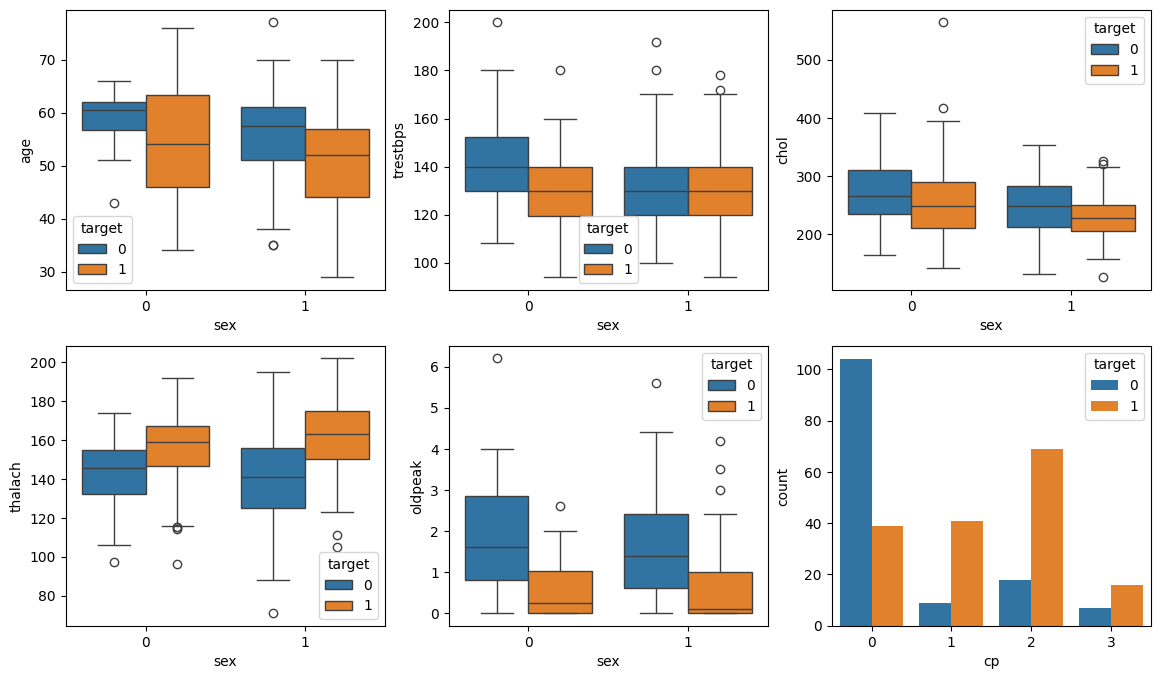

In [99]:
# S2.1: Obtain boxplot for continuous features
# Prepare a subplot with rows = 2 and columns = 3
fig,axis=plt.subplots(ncols=3,nrows=2,figsize=(14,8))
sns.boxplot(x='sex',hue='target',y='age',data=df,ax=axis[0,0])
sns.boxplot(x='sex',hue='target',y='trestbps',data=df,ax=axis[0,1])
sns.boxplot(x='sex',hue='target',y='chol',data=df,ax=axis[0,2])
sns.boxplot(x='sex',hue='target',y='thalach',data=df,ax=axis[1,0])
sns.boxplot(x='sex',hue='target',y='oldpeak',data=df,ax=axis[1,1])
sns.countplot(x='cp',hue='target',data=df,ax=axis[1,2])
plt.show()





# Box-Plot 'age' vs 'sex' with hue = 'target' in (0,0) axis


# Box-Plot 'age' vs 'trestbps' with hue = 'target' in (0,1) axis


# Box-Plot 'age' vs 'chol' with hue = 'target' in (0,2) axis


# Box-Plot 'age' vs 'thalach' with hue = 'target' in (1,0) axis


# Box-Plot 'age' vs 'oldpeak' with hue = 'target' in (1,1) axis


# Count-Plot of 'cp' with hue = 'target in (1,2) axis



Here we observe there are no significant outliers in the dataset. Also, we observe that the majority of the `cp` values are `0`.

Next, let's explore the correlation matrix for the entire dataset to see which features contribute higher towards a patient exhibiting probability of heart disease.

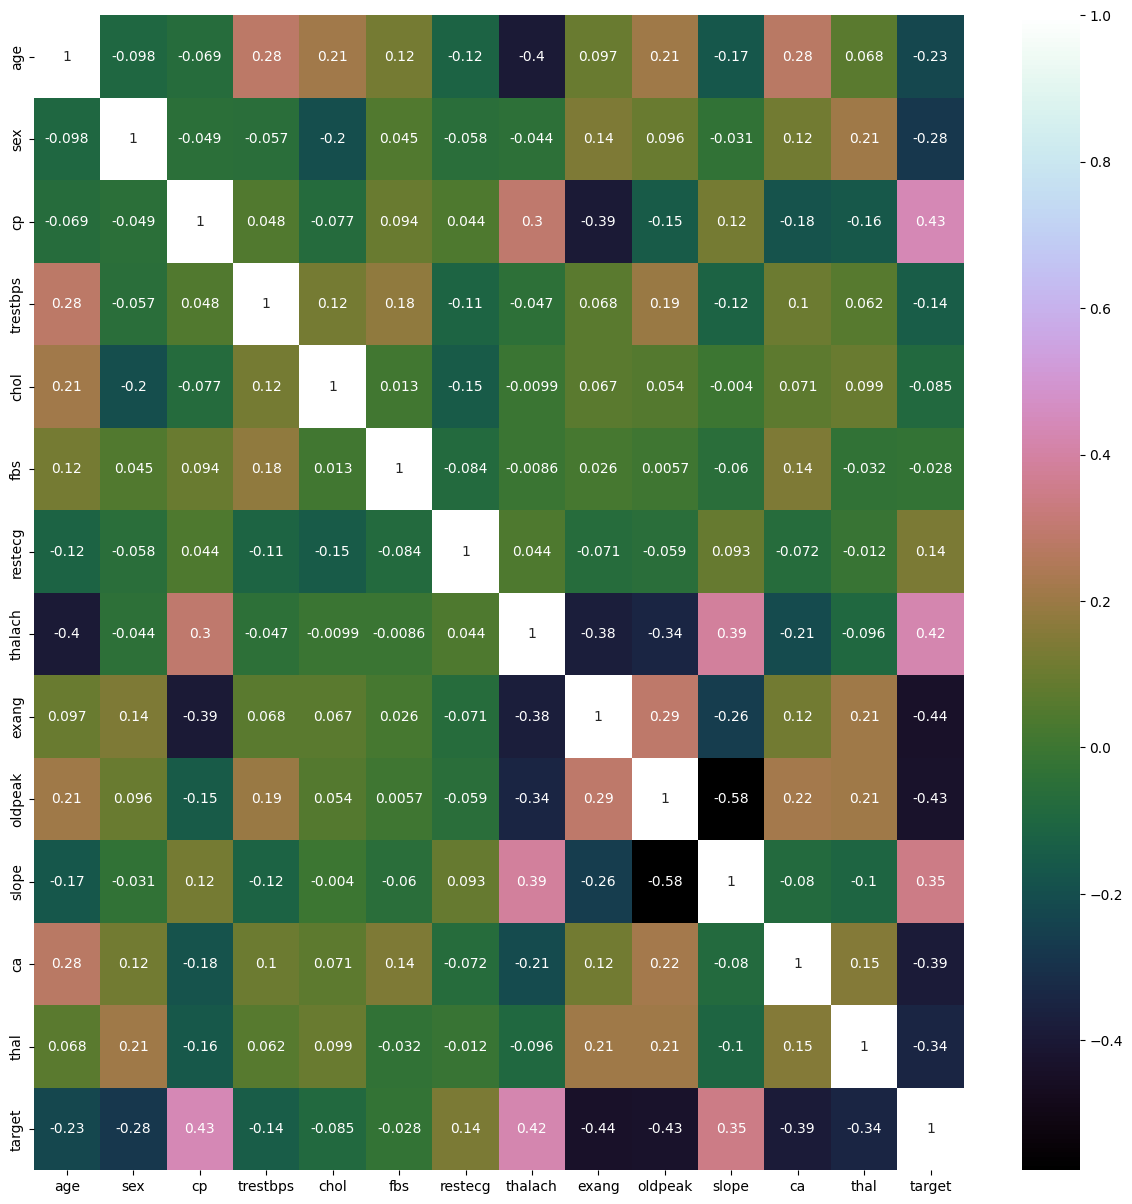

In [100]:
# S2.2: Obtain the correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix')
plt.show()

Of the 13 features in the dataset features: `cp`, `thalach`, `slope` show highest positive correlation and the feaures: `exang`, `oldpeak`, `ca`, `thal` show highest negative correlation with `target`. Surprisingly, cholesterol (`chol`) does not exhibit a higher correlation value.

Before we proceed with the classifier design let's split the dataset into train-test sets.

In [101]:
# S2.3: Import train_test_split function
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1=train_test_split(feat_df,target_df,test_size=0.3,random_state=42)
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

# Split dataset into training set and test set

# Print the shape of train and test sets.


(212, 13)
(212,)
(91, 13)
(91,)


Here, we got the dimension of train set of features dataset is `(212, 13)` and target dataset is `(212,)`. Dimension of test set of features dataset is `(91, 13)` and target dataset is `(91,)`.

---

#### Activity 3: Naive Bayes Classifier

Naive Bayes is a simple algorithm which falls under Supervised Learning technique. Why is it called Naive Bayes?

- **Naive:** It is called naive as it is based on a simple assumption that all the features of dataset are mutually independent.

- **Bayes:** It is based on **Bayes Theorem**.

<br>

Bayes theorem is based on **Conditional Probability** which states that something will happen, given that something else has already occurred. By using conditional probability, we can find out the probability of an event will occur given the knowledge of the previous event.

Calculating conditional probability is as simple as predicting the chances of Lionel Messi scoring a goal based on his form (goals scored in recent matches) and opponent team.

<br>

Mathematically Baye's theorem can be expressed as:

\begin{align}
P(A|B) = \frac{P(B|A).P(A)}{P(B)}
\end{align}

Where,

- $P(A|B)$ is **Posterior probability** i.e. probability of event A given value of event B.

- $P(B|A)$ is **Likelihood** of event B given event A is true.

- $P(A)$ is **Prior probability**, probability of event A.

- $P(B)$ is **Marginal probability** or **Evidence**, probability of event B.

<br>


💡 Don't worry if it feels a bit complicated, we will explore each of these terms along with `GaussianNB` classifier with sufficient details using simple examples in the next lesson.

<br>

---

<br>

For now, let us focus on building a classifier using the `sklearn` module for the given problem statement. To construct a classifier using Naive Bayes:

1. Import the required library which contains methods and attributes to design a Naive Bayes classifier.

  ```python
  from sklearn.naive_bayes import GuassianNB
  ```
2. Create an object (say `nb_clf`) of the `GaussianNB()` constructor.

4. Call the `fit()` function on the above constructor with train features and target variables as inputs.

5. Get the predicted target values for both train and test sets by calling the `predict()` function on `nb_clf`.

6. Get the accuracy score on both train and test sets by calling the `score()` function on the classifier object.




In [102]:
# S3.1: Create Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train1,y_train1)
train_pred1=nb.predict(x_train1)
test_pred1=nb.predict(x_test1)
print(nb.score(x_train1,y_train1))
print(nb.score(x_test1,y_test1))


# Import the required library


# Modeling the NB classifier


# Predicting the train and test sets


# Evaluating accuracy scores


0.8301886792452831
0.8351648351648352


The accuracy scores seems promising. Let us also plot a confusion matrix and print classification report for the test set.

In [103]:
# S3.2: Obtain the confusion matrix for the classifier
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test1,test_pred1))
print(classification_report(y_test1,test_pred1))

[[36  5]
 [10 40]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



The accuracy scores, precision, recall and f1-score seems promising for the test dataset with a total of only $12 + 7 = 19$ misclassified cases.

Next let us build a logistic regression based classifier to set a benchmark for performance.

---

#### Activity 4: Logistic Regression

Before we proceed with classifier design, let's normalise the dataset. Before that, let us obtain a list of features that contain only two unique values i.e. `0` and `1`.

In [104]:
# T4.1: Obtain a list of discrete features
disc_feat=[]
for i in feat_df.columns:
  if feat_df[i].nunique()<3:
    disc_feat.append(i)
print(len(disc_feat))
print(disc_feat)




3
['sex', 'fbs', 'exang']


Hence, 3 discrete features contains only two unique values `0` and `1`. We will  use `StandardScaler` to scale all the feature variables excluding these 3 discrete features as their values already lie in the range `[0, 1]`.



In [105]:
# T4.2: Normalise the feature values.
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
cont_df=feat_df.drop(disc_feat,axis=1)

scale_val=ss.fit_transform(cont_df)
scale_df=pd.DataFrame(scale_val,columns=cont_df.columns)
scale_df

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,0.952197,1.973123,0.763956,-0.256334,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,1.002577,-0.092738,0.072199,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,0.032031,-0.092738,-0.816773,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.032031,-0.663867,-0.198357,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-0.938515,-0.663867,2.082050,0.898962,0.583939,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-0.938515,0.478391,-0.101730,0.898962,-1.165281,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,1.973123,-1.234996,0.342756,0.898962,-0.771706,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,-0.938515,0.706843,-1.029353,0.898962,-0.378132,2.036303,-0.649113,1.244593,1.123029
301,0.290464,-0.938515,-0.092738,-2.227533,0.898962,-1.515125,0.138373,-0.649113,0.265082,1.123029


Now that we have scaled all the feature variables having either continuous values or more than 2 unique values, let us concatenate the scaled continuous features with the discrete features using `pd.concat()` function.



In [106]:
# S4.1: Contenate the scaled continuous features  with discrete features.
feat_df=pd.concat([scale_df,feat_df[disc_feat]],axis=1)
feat_df

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,sex,fbs,exang
0,0.952197,1.973123,0.763956,-0.256334,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-2.148873,1,1,0
1,-1.915313,1.002577,-0.092738,0.072199,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.512922,1,0,0
2,-1.474158,0.032031,-0.092738,-0.816773,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.512922,0,0,0
3,0.180175,0.032031,-0.663867,-0.198357,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.512922,1,0,0
4,0.290464,-0.938515,-0.663867,2.082050,0.898962,0.583939,-0.379244,0.976352,-0.714429,-0.512922,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-0.938515,0.478391,-0.101730,0.898962,-1.165281,-0.724323,-0.649113,-0.714429,1.123029,0,0,1
299,-1.033002,1.973123,-1.234996,0.342756,0.898962,-0.771706,0.138373,-0.649113,-0.714429,1.123029,1,0,0
300,1.503641,-0.938515,0.706843,-1.029353,0.898962,-0.378132,2.036303,-0.649113,1.244593,1.123029,1,1,0
301,0.290464,-0.938515,-0.092738,-2.227533,0.898962,-1.515125,0.138373,-0.649113,0.265082,1.123029,1,0,1


Hence, we have obtained the final scaled DataFrame containing the feature variables. Let us again perform train-test split on the scaled feature DataFrame and target DataFrame.

In [107]:
# S4.2: Split dataset into training set and test set
x_train2,x_test2,y_train2,y_test2=train_test_split(feat_df,target_df,test_size=0.3,random_state=42)
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

# Print the shape of train and test sets.


(212, 13)
(212,)
(91, 13)
(91,)


To construct a classifier using logistic regression:

1. Import the required library which contains methods and attributes to design the classifier.

  ```python
from sklearn.linear_model import LogisticRegression
  ```
2. Create an object (say `lg_clf`) of the `LogisticRegression()` constructor and set `max_iter = 1000`.

4. Call the `fit()` function on the above constructor with train features and target variables as inputs.

5. Get the predicted target values for both train and test sets by calling the `predict()` function on `lg_clf`.

6. Get the accuracy score on both train and test sets by calling the `score()` function on the classifier object.

In [108]:
# S4.3: Create a multivariate logistic regression model. Also, predict the target values for the train set.

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train2,y_train2)
print(lr.score(x_train2,y_train2))
train_pred2=lr.predict(x_train2)
test_pred2=lr.predict(x_test2)
print(lr.score(x_test2,y_test2))
# Modeling the Logistic Regression Classifier

# Predicting the train and test sets

# Evaluating accuracy scores


0.8773584905660378
0.8131868131868132


The accuracy scores seems promising. Let's also plot a confusion matrix and print classification report for the test set.

In [109]:
# S4.4: Obtain the Confusion Matrix and classification report.
print(confusion_matrix(y_test,test_pred))
print(classification_report(y_test,test_pred))

[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



The accuracy scores, precision, recall and f1-score seems promising for the test dataset. However, we have a total of $13 + 9 = 22$ misclassified cases which is greater than **N**aive **B**ayes (NB) classifier.

Next let us build kNN classifier to further compare the classifier performance.

---

#### Activity 5: kNN Classifier

For kNN classifier, let's find a value of $k$ which can give a good train and test set accuracy. For this, we can determine the accuracy scores for neighbours from `1` to `20` and plot these scores using the steps given below:

1. Import the required library:

  ```python
from sklearn.neighbors import KNeighborsClassifier
  ```

2. Create two lists `acc_train` and `acc_test` to store the accuracy scores of train set and test set for various $k$ values.

3. Initiate a `for` loop that ranges from `1` to `21` with the current iterator stored in variable `k`. Inside this `for` loop:

  - Create an object of `KNeighborsClassifier` class with `n_neighbors = k` as input.

  - Call the `fit()` function using the object of  `KNeighborsClassifier` class and pass train set as inputs to this function.

  - Determine the train set and test set accuracy scores for current `k` value and append these scores to the `acc_train` and `acc_test` lists respectively.

4. Visualise the  values of `acc_train` and `acc_test` lists using line plots.

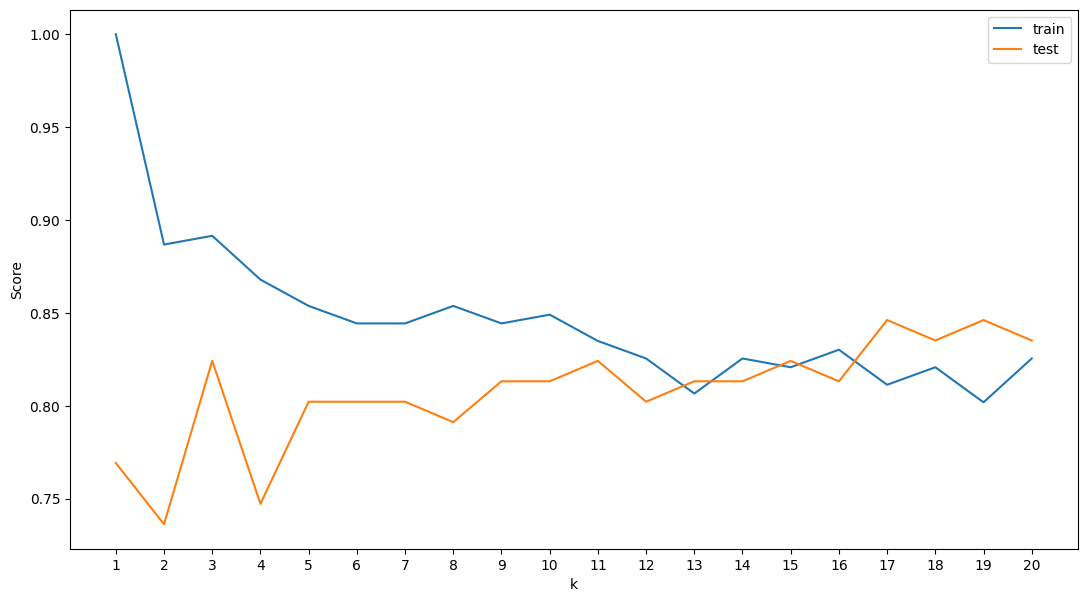

In [110]:
# S5.1: Plot accuracy scores of train and test sets for 1 to 20 neighbours.
from sklearn.neighbors import KNeighborsClassifier

acc_train=[]
acc_test=[]
for i in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train2,y_train2)
  acc_train.append(knn.score(x_train2,y_train2))
  acc_test.append(knn.score(x_test2,y_test2))
plt.figure(figsize=(13,7))
plt.plot(np.arange(1,21),acc_train,label='train')
plt.plot(np.arange(1,21),acc_test,label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('Score')
plt.xticks(range(1,21))
plt.show()




# Define the empty lists


# Modeling the kNN classifier for k neighbors


# Plotting the accuracy scores


You may observe that with an increase in the number of neighbours, train set accuracy decreases whereas test set accuracy increases. As test set accuracy is a better estimate than train set accuracy for unseen data, we can say that $13$ is an optimal value for $k$. As beyond $k = 13$ the test set accuracy also starts to decrease.

Let us now deploy the kNN classifier model for $k = 13$ and evaluate the performance of this model.

In [111]:
# S5.2: Modeling the kNN classifier
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train2,y_train2)
print(knn.score(x_train2,y_train2))
print(knn.score(x_test2,y_test2))
train_pred3=knn.predict(x_train2)
test_pred3=knn.predict(x_test2)



# Predicting the train and test sets


# Evaluating accuracy scores


0.8113207547169812
0.8461538461538461


The accuracy scores seems to be the best among all the classifiers. Let's plot the confusion matrix for the test set.

In [112]:
# S5.3: Obtain the Confusion Matrix for the Classifier
print(confusion_matrix(y_test2,test_pred3))
print(classification_report(y_test2,test_pred3))


[[32  9]
 [ 5 45]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



The accuracy scores, precision, recall and f1-score are best with only a total of $14 + 5 = 19$ misclassified cases.

To further analyse the classifier performance let's obtain the AUC score and plot the ROC curves for the classifiers.

---

####Activity 6: Model Evaluation - ROC Curve

Let's obtain the AUC score and plot the ROC curve for the classifiers. For this:

1. Import the required library:

  `from sklearn.metrics import roc_auc_score`

2. Obtain the AUC scores for all the three classifiers by calling the `roc_auc_score()` function and passing test target variable and its predicted value as inputs.

In [113]:
# S6.1: Obtain the AUC Scores for the Classifiers
# Import 'roc_auc_score' from sklearn.metrics

from sklearn.metrics import roc_auc_score

roc_nb=roc_auc_score(y_test1,test_pred1)
roc_lr=roc_auc_score(y_test2,test_pred2)
roc_knn=roc_auc_score(y_test2,test_pred3)
print(roc_nb)
print(roc_lr)
print(roc_knn)

# Predict the score of test sets using 'roc_auc_score' for NB Classifier


# Predict the score of test sets using 'roc_auc_score' for Logistic Regression Classifier


# Predict the score of test sets using 'roc_auc_score' for kNN Classifier



0.8390243902439025
0.8102439024390243
0.8402439024390244


Both kNN  and Naive Bayes classifier exhibits same highest AUC score followed by Logistic Regression classifier.

<br>

Next plot the ROC curve for the classifiers using the steps given below:

1. Import the required library:

  `from sklearn.metrics import roc_curve`

2. Unpack the `fpr`, `tpr`, and `threshold` values for the classifiers using `roc_curve()` function.

3. For baseline $y = x$, Set `x = [0, 1], y = [0, 1]`, `linestyle = '--'`, and `label = 'Baseline'`

4. Plot the ROC curves for all the  classifiers and set different colors for them to have a good readability.

5. Provide the relevant title to the plot; label the x, y axes; and insert legends to the graphs.

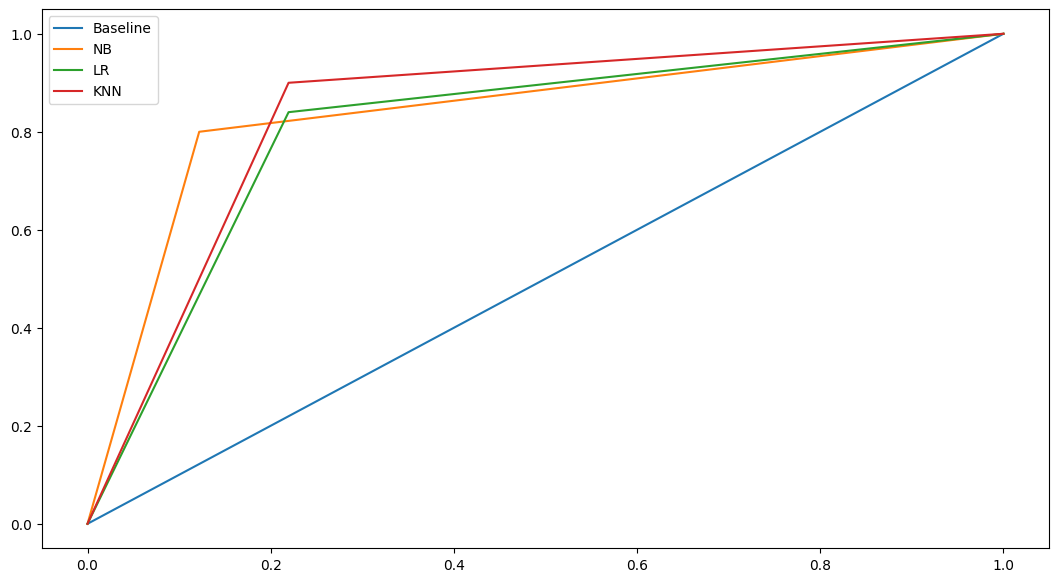

In [114]:
# S6.2: Plot the ROC curve for the classifiers
from sklearn.metrics import roc_curve

fpr_nb,tpr_nb,thr_nb=roc_curve(y_test1,test_pred1)
fpr_lr,tpr_lr,thr_lr=roc_curve(y_test2,test_pred2)
fpr_knn,tpr_knn,thr_knn=roc_curve(y_test2,test_pred3)
plt.figure(figsize=(13,7))
plt.plot([0,1],[0,1],label='Baseline')
plt.plot(fpr_nb,tpr_nb,label='NB')
plt.plot(fpr_lr,tpr_lr,label='LR')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.legend()
plt.show()



# Obtain 'fpr', 'tpr' and threshold values for NB Classifier using 'roc_curve' function


# Obtain 'fpr', 'tpr' and threshold values for Logistic Regression Classifier using 'roc_curve' function


# Obtain 'fpr', 'tpr' and threshold values for kNN Classifier using 'roc_curve' function


# Plot roc curves along with a baseline



From the ROC curve and confusion matrix we can observe that the kNN classifier exhibits best result (as it has highest `tpr`) followed by Naive Bayes classifier and lastly the Logistic Regression classifier.

Key points to remember💭

1. However, with kNN classifier the computing time is high as we need to obtain the optimal value of $k$ neighbours for which the classifier exhibits the best performance.

2. The data normalisation is almost a mandatory process for most of the classifiers, however for the Naive Bayes classifier we didn't normalise the dataset as for `GaussianNB` the data normalisation is an internal process.

<br>

Let's stop here. In the next class, we will understand the working of Naive Bayes classifier with a relatively simple example and explore the underlying mathematics behind the Bayes theorem.

---

### **Project**

You can now attempt the **Applied Tech Project 125 - Naive Bayes** on your own.

**Applied Tech Project 125 - Naive Bayes**: https://colab.research.google.com/drive/1d-vNAvNJ-57okkqQWpiNXojL2Fc7hVpi








---

